In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/ec305e78-f231-4a77-b32c-1e0c4c67615e')

In [3]:
dpt = departements[departements['code_departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95' ])]

In [4]:
amenagements = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/33d97256-1829-41d3-b7b5-56e490846b85")
#https://www.data.gouv.fr/fr/datasets/amenagements-velo-en-ile-de-france-2/#_

**Version 2**

In [5]:
conditionlist = [
                 (amenagements['ag'].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (amenagements['ag'].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (amenagements['ag'].isin(['piste uni', 'piste bi'])),
                 (amenagements['ag'].isin(['bande uni', 'bande bi'])),
                 (amenagements['ag'].isin(['voie verte uni'])),
                 (amenagements['ag'].isin(['voie bus uni'])),
                (amenagements['ag'].isin(['DSC','DSC piste', 'DSC bande']))]

choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus','double sens cyclable']
amenagements['typeag'] = np.select(conditionlist, choicelist, default = 'non défini')

In [6]:
#on simplifie les types de pistes
conditionlist = [
                 (amenagements['ad'].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (amenagements['ad'].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (amenagements['ad'].isin(['piste uni', 'piste bi'])),
                 (amenagements['ad'].isin(['bande uni', 'bande bi', 'DSC bande'])),
                 (amenagements['ad'].isin(['voie verte uni'])),
                 (amenagements['ad'].isin(['voie bus uni'])),
                (amenagements['ad'].isin(['DSC','DSC piste', 'DSC bande']))]
choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus','double sens cyclable']
amenagements['typead'] = np.select(conditionlist, choicelist, default = 'non défini')

In [85]:
demande = str((input('Que voulez-vous afficher ? \nbande, double sens cyclable, piste, trottoir, voie bus, voie propre, voie verte, non défini, tout')))
demande = list(demande.split(", "))

Que voulez-vous afficher ? 
 bande, double sens cyclable, piste, trottoir, voie bus, voie propre, voie verte, non défini, toutdouble sens cyclable


In [157]:
if demande == ['tout']:
    amdem = amenagements
else :
    if 'double sens cyclable' in demande :
        demande.remove('double sens cyclable')
        if demande == []:
            amdem = amenagements[amenagements['typeag'].isin(['double sens cyclable'])]
        else :
            amdem = amenagements[(amenagements['typead'].isin(demande))&(amenagements['typeag'].isin(demande))&(amenagements['typeag'].isin(['double sens cyclable']))]
    else :
        amdem = amenagements[(amenagements['typead'].isin(demande))&(amenagements['typeag'].isin(demande))]


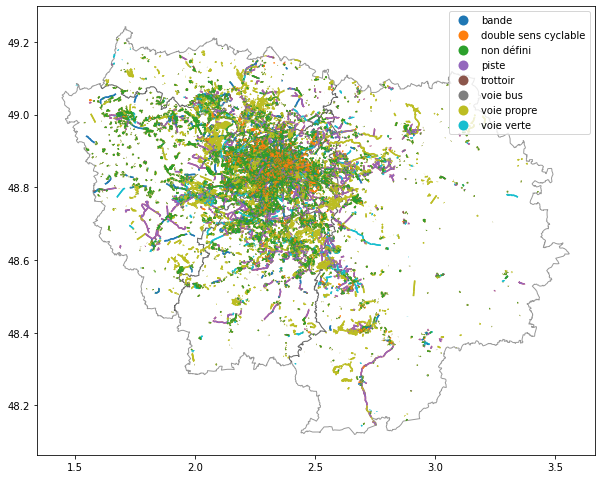

In [163]:
if demande == []:
    fig, ax = plt.subplots(figsize = (10,10))
    dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)
    amdem.plot(ax=ax,column = 'typeag', legend = True)
    plt.show
else :   
    fig, ax = plt.subplots(figsize = (10,10))
    dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)
    amdem.plot(ax=ax,column = 'typead', legend = True)
    amdem.plot(ax=ax,column = 'typeag', legend = True)
    plt.show

**Version 1** - deprecated

Pour que la carte soit bien compréhensible on doit supprimer les pistes pour lequelles les deux sens de circulation ne sont pas du même type : on ne peut pas représenter une même géométrie de deux couleurs différentes. En faisant ça on supprime environ 1000 observations sur 35 000

In [ ]:
am = amenagements.dropna(subset = ['ad','ag']) 

In [ ]:
am = am.drop('ag', axis =1)

In [ ]:
amenagements[amenagements['ag'] == None]

In [ ]:
am.groupby('ad').count()

In [ ]:
#on simplifie les types de pistes
conditionlist = [
                 (am['ad'].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (am['ad'].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (am['ad'].isin(['piste uni', 'piste bi'])),
                 (am['ad'].isin(['bande uni', 'bande bi', 'DSC bande'])),
                 (am['ad'].isin(['voie verte uni'])),
                 (am['ad'].isin(['voie bus uni']))]
choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus']
am['type'] = np.select(conditionlist, choicelist, default = 'Not Specified')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)
am[am['type'] == 'voie propre'].plot(ax=ax,color = 'salmon', label = 'Voie propre')
am[am['type'] == 'piste'].plot(ax=ax, color = 'tab:blue', alpha = 0.3, label = 'Piste cyclable')
am[am['type'] == 'voie verte'].plot(ax=ax, color = 'tab:green', label = 'Voie verte')
am[am['type'] == 'voie bus'].plot(ax=ax, color = 'gold', label = 'Voie bus')
am[am['type'] == 'trottoir'].plot(ax=ax, color = 'tab:orange', label = 'Trottoir')
am[am['type'] == 'bande'].plot(ax=ax, color = 'orchid', label = 'Bande cyclable')
plt.title('Différents types d\'aménagement cyclable à double sens en Ile de France')
plt.legend()
plt.show()